In [41]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl    

In [42]:
rho_dollar_delta = np.array([
    0.05194,
    0.11857,
    0.13843,
    0.11836,
    0.13575,
    0.13604,
    0.12446,
    0.11849,
    0.12445,
    0.12986,
    0.12945
])
Położenie_preta = np.array([
    219.0,
    307.3,
    388.9,
    450.0,
    517.6,
    584.0,
    646.0,
    712.0,
    790.0,
    883.0,
    1099.3
])
rho_dollar = np.cumsum(rho_dollar_delta)
print(rho_dollar)

[0.05194 0.17051 0.30894 0.4273  0.56305 0.69909 0.82355 0.94204 1.06649
 1.19635 1.3258 ]


In [43]:
X = np.array([Położenie_preta])
Y = np.array([rho_dollar])
print(X)    
print(Y)



[[ 219.   307.3  388.9  450.   517.6  584.   646.   712.   790.   883.
  1099.3]]
[[0.05194 0.17051 0.30894 0.4273  0.56305 0.69909 0.82355 0.94204 1.06649
  1.19635 1.3258 ]]


In [44]:
# plt.plot(X, Y, marker='o')
# plt.xlabel('Położenie pręta mm')
# plt.ylabel('ρ $')
# plt.title('Wykres ρ$ w funkcji położenia pręta')
# plt.grid(True)
# plt.show()


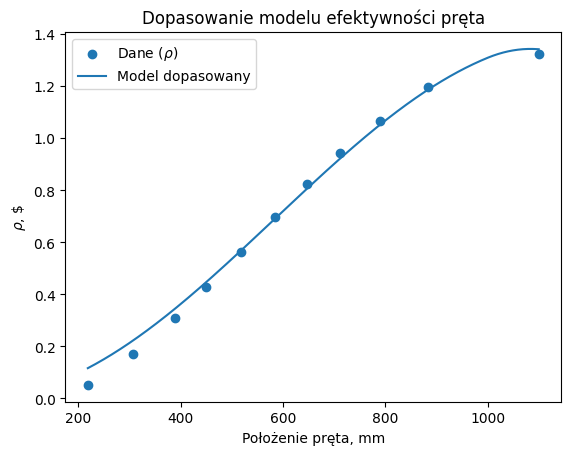

Dopasowane parametry modelu:
SSE = 0.009895991260575136
SST = 1.7911235233636367
a = 0.0018553153 ± 0.0000232775
H = 1166.7318755166 ± 28.3298767894
R² = 0.9944749811325179


In [45]:

L = 1000.0
def efektywnosc(z, H, L):
    z = np.asarray(z, dtype=float)

    idx = np.zeros_like(z, dtype=int)
    idx[(z >  -H/2)      & (z <  -H/2 + L)] = 1
    idx[(z >= -H/2 + L)  & (z <   H/2)]     = 2
    idx[(z >=  H/2)      & (z <   H/2 + L)] = 3

    wzory = [
        np.zeros_like(z),  
        (H/np.pi) * (np.sin(np.pi * z / H) + 1.0),                          
        (H/np.pi) * (np.sin(np.pi * z / H) - np.sin(np.pi * (z - L) / H)),  
        (H/np.pi) * (1.0 - np.sin(np.pi * (z - L) / H))                     
    ]
    return np.choose(idx, wzory)
#Funkcja dopasowania
def model_curvefit(X_mm, a, H):
    z = np.asarray(X_mm, dtype=float) - H/2 # przesuwam środek do prawdziwego środka
    return a * efektywnosc(z, H, L)  


X = Położenie_preta
Y = rho_dollar

p0 = (0.002, 2000)  # (a, H)

popt, pcov = curve_fit(model_curvefit, X, Y, p0=p0)
a, H = popt

sigma_a, sigma_H = np.sqrt(np.diag(pcov))

Y_fit = model_curvefit(X, a, H)
res = Y - Y_fit

SSE = np.sum(res**2)
SST = np.sum((Y - np.mean(Y))**2)
R2 = 1.0 - SSE / SST if SST > 0 else np.nan
RMSE = np.sqrt(np.mean(res**2))
MAE = np.mean(np.abs(res))

# Gładka krzywa do wykresu
x_plot = np.linspace(X.min(), X.max(), 1000)
y_plot = model_curvefit(x_plot, a, H)


plt.figure()
plt.scatter(X, Y, label=r"Dane ($\rho$)")
plt.plot(x_plot, y_plot, label=r"Model dopasowany")
plt.xlabel(r"Położenie pręta, mm")
plt.ylabel(r"$\rho$, \$")
plt.title(r"Dopasowanie modelu efektywności pręta")
plt.legend()
plt.show()



print("Dopasowane parametry modelu:")
print("SSE =", SSE)
print("SST =", SST)
print(f"a = {a:.10f} ± {sigma_a:.10f}")
print(f"H = {H:.10f} ± {sigma_H:.10f}")
print("R² =", R2)

